In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('appliance_energy.csv')
df.head()

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [7]:
df.shape

(100, 2)

In [8]:
df.isnull().sum()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#feature and target selection
X=df[['Temperature (°C)']]
Y=df['Energy Consumption (kWh)']

In [11]:
X.shape

(100, 1)

In [12]:
Y.shape

(100,)

In [13]:
# import the ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# split it to ttrain test
X_train, X_test, Y_train, Y_test =train_test_split(X,
                                                    Y,
                                                    train_size=0.8,
                                                    random_state=42)

In [15]:
X_test.shape

(20, 1)

In [16]:
X_train.shape

(80, 1)

In [23]:
model =  LinearRegression()

In [24]:
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = model.predict(X_test)
print(f' the model predictions are \n{Y_pred}')

 the model predictions are 
[1.6858187  3.18154068 2.96097494 2.76354868 2.0370856  2.36343345
 2.09711944 3.12445907 1.60849483 2.24537556 2.34866555 2.66462648
 3.0387357  3.27880886 1.78664542 1.85218469 2.95922164 1.70468695
 3.0692904  1.87828475]


In [28]:
len(Y_pred)

20

In [31]:
#evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
mse

0.16342487842925052

In [33]:
r2 = r2_score(Y_test, Y_pred)
r2

0.6119478445218715

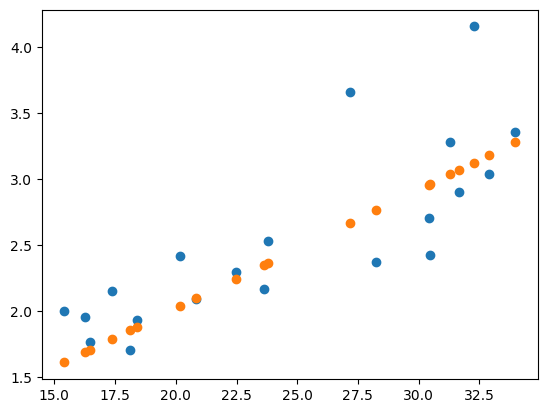

In [35]:
plt.scatter(X_test, Y_test, label='Actual Data')
plt.scatter(X_test, Y_pred, label='predicated data')

In [36]:
# to save the model
import joblib
joblib.dump(model, 'LR_Model.pkl')

['LR_Model.pkl']

In [37]:
joblib.load('LR_Model.pkl')

LinearRegression()